In [134]:
from Crypto.Cipher import AES
import time
from os import listdir, urandom
from os.path import dirname, join, abspath
import pprint
import matplotlib.pyplot as plt
import numpy as np
import base64

In [135]:
curr_path = abspath('')
files = [join(curr_path, 'text-samples', f) for f in listdir(join(curr_path, 'text-samples'))]

In [136]:
key = urandom(16)

In [137]:
# =====
# ECB    
# =====

def ecb_encrypt(key, text):
    cipher = AES.new(key, AES.MODE_ECB)
    ciphertext = cipher.encrypt(text.encode('utf-8'))
    return ciphertext

def ecb_decrypt(key, ciphertext):
    cipher = AES.new(key, AES.MODE_ECB)
    text = cipher.decrypt(ciphertext).decode('utf-8')
    return text

# =====
# CBC   
# =====

def cbc_encrypt(key, text):
    cipher = AES.new(key, AES.MODE_CBC)
    text_bytes = text.encode('utf-8')        
    ct = cipher.encrypt(text_bytes)
    iv = cipher.iv
    return iv, ct

def cbc_decrypt(iv, key, ct):
    cipher = AES.new(key, AES.MODE_CBC, iv=iv)
    text = cipher.decrypt(ct).decode('utf-8')
    return text   

# =====
# CTR  
# =====

def ctr_encrypt(key, text):
    text_bytes = text.encode('utf-8')
    cipher = AES.new(key, AES.MODE_CTR)
    ct = cipher.encrypt(text_bytes)
    nonce = cipher.nonce        
    return nonce, ct

def ctr_decrypt(nonce, key, ct):
    cipher = AES.new(key, AES.MODE_CTR, nonce=nonce)
    text = cipher.decrypt(ct).decode('utf-8')
    return text

# ====
# OFB
# ====

def ofb_encrypt(key, text):
    text_bytes = text.encode('utf-8')
    cipher = AES.new(key, AES.MODE_OFB)
    ct = cipher.encrypt(text_bytes)
    iv = cipher.iv
    return iv, ct

def ofb_decrypt(iv, key, ct):
    cipher = AES.new(key, AES.MODE_OFB, iv=iv)
    text = cipher.decrypt(ct).decode('utf-8')
    return text

# ====
# CFB
# ====

def cfb_encrypt(key, text):
    text_bytes = text.encode('utf-8')
    cipher = AES.new(key, AES.MODE_CFB)
    ct = cipher.encrypt(text_bytes)
    iv = cipher.iv
    return iv, ct

def cfb_decrypt(iv, key, ct):
    cipher = AES.new(key, AES.MODE_CFB, iv=iv)
    text = cipher.decrypt(ct).decode('utf-8')
    return text

In [138]:
texts = []
for f in files:
    file = open(f, "r")
    size = float(file.readline().strip())

    res_dict = {}

    # read text
    text = ""
    for l in file:
        text += l
    
    file.close()
    texts.append((text, size))
    


In [139]:
results = {}
for t in texts:
    
    size = t[1]
    text = t[0]
    res_dict = {}  
    

    # tryb ECB
    start = time.perf_counter_ns()
    ciphertext = ecb_encrypt(key, text)
    end = time.perf_counter_ns()
    res_dict['ECB_en_time'] = end - start
    
    start = time.perf_counter_ns()
    decrypted_message = ecb_decrypt(key, ciphertext)
    end = time.perf_counter_ns()
    res_dict['ECB_de_time'] = end - start

    
    # tryb CBC    
    start = time.perf_counter_ns()
    iv, ciphertext = cbc_encrypt(key, text)
    end = time.perf_counter_ns()
    res_dict['CBC_en_time'] = end - start
    
    start = time.perf_counter_ns()
    decrypted_message = cbc_decrypt(iv, key, ciphertext)
    end = time.perf_counter_ns()
    res_dict['CBC_de_time'] = end - start

    
    # tryb CTR
    start = time.perf_counter_ns()
    nonce, ciphertext = ctr_encrypt(key, text)
    end = time.perf_counter_ns()
    res_dict['CTR_en_time'] = end - start
    
    start = time.perf_counter_ns()
    decrypted_message = ctr_decrypt(nonce, key, ciphertext)
    end = time.perf_counter_ns()
    res_dict['CTR_de_time'] = end - start

    
    # tryb OFB    
    start = time.perf_counter_ns()
    iv, ciphertext = ofb_encrypt(key, text)
    end = time.perf_counter_ns()
    res_dict['OFB_en_time'] = end - start
    
    start = time.perf_counter_ns()
    decrypted_message = ofb_decrypt(iv, key, ciphertext)
    end = time.perf_counter_ns()
    res_dict['OFB_de_time'] = end - start


    # tryb CFB
    start = time.perf_counter_ns()
    iv, ciphertext = cfb_encrypt(key, text)
    end = time.perf_counter_ns()
    res_dict['CFB_en_time'] = end - start
    
    start = time.perf_counter_ns()
    decrypted_message = cfb_decrypt(iv, key, ciphertext)
    end = time.perf_counter_ns()
    res_dict['CFB_de_time'] = end - start
    
    results[size] = res_dict


In [140]:
labels = [str(l)+'MB' for l in sorted(results)]
x = np.arange(len(labels))
width = 0.35
sizes = [s for s in results]

# Porównanie szybkości szyfrowania i deszyfrowania przy użyciu poszczególnych trybów pracy szyfrów blokowych w zależności od wielkości pliku

## ECB

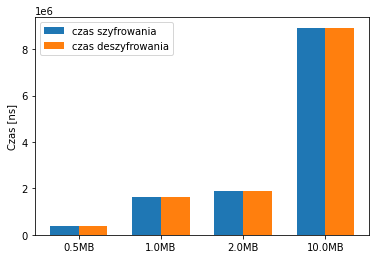

In [141]:
en_times = []
de_times = []
for i in sorted(sizes):
    en_times = [results[i]['ECB_de_time'] for i in sorted(results)]
    de_times = [results[i]['ECB_de_time'] for i in sorted(results)]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, en_times, width, label='czas szyfrowania')
rects2 = ax.bar(x + width/2, de_times, width, label='czas deszyfrowania')
ax.legend()
ax.set_ylabel('Czas [ns]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

# CBC


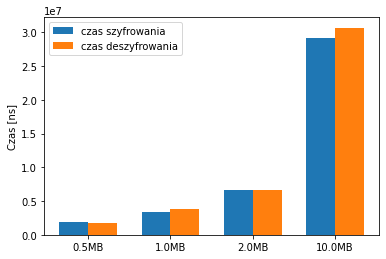

In [142]:
en_times = [results[i]['CBC_en_time'] for i in sorted(results)]
de_times = [results[i]['CBC_de_time'] for i in sorted(results)]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, en_times, width, label='czas szyfrowania')
rects2 = ax.bar(x + width/2, de_times, width, label='czas deszyfrowania')
ax.legend()
ax.set_ylabel('Czas [ns]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

# CTR

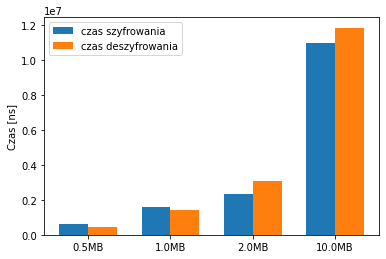

In [143]:
en_times = [results[i]['CTR_en_time'] for i in sorted(results)]
de_times = [results[i]['CTR_de_time'] for i in sorted(results)]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, en_times, width, label='czas szyfrowania')
rects2 = ax.bar(x + width/2, de_times, width, label='czas deszyfrowania')
ax.legend()
ax.set_ylabel('Czas [ns]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

# OFB

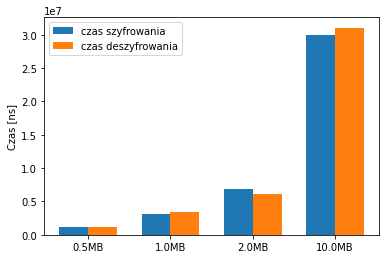

In [144]:
en_times = [results[i]['OFB_en_time'] for i in sorted(results)]
de_times = [results[i]['OFB_de_time'] for i in sorted(results)]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, en_times, width, label='czas szyfrowania')
rects2 = ax.bar(x + width/2, de_times, width, label='czas deszyfrowania')
ax.legend()
ax.set_ylabel('Czas [ns]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

# CFB

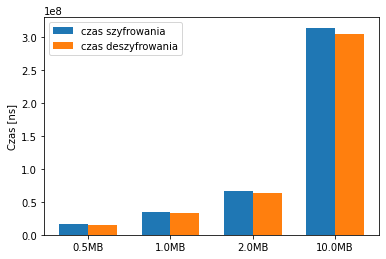

In [145]:
en_times = [results[i]['CFB_en_time'] for i in sorted(results)]
de_times = [results[i]['CFB_de_time'] for i in sorted(results)]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, en_times, width, label='czas szyfrowania')
rects2 = ax.bar(x + width/2, de_times, width, label='czas deszyfrowania')
ax.legend()
ax.set_ylabel('Czas [ns]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

# Porównanie trybów pracy dla plików o różnych rozmiarach


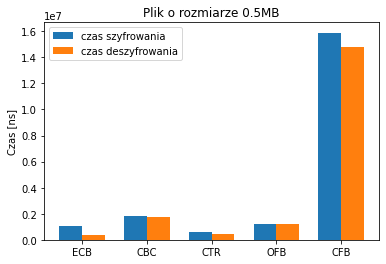

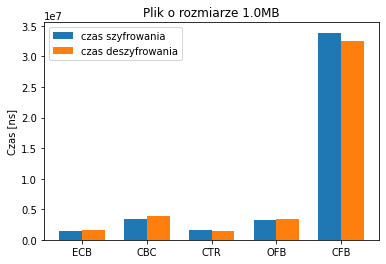

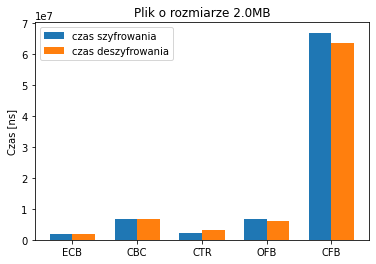

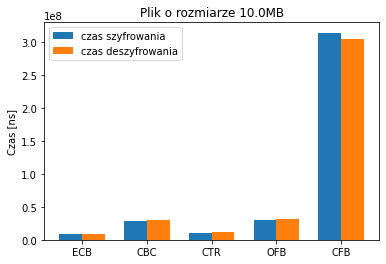

In [146]:
labels = ['ECB', 'CBC', 'CTR', 'OFB', 'CFB']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
for i in sorted(results):
    en_times = [results[i][l+'_en_time'] for l in labels]
    de_times = [results[i][l+'_de_time'] for l in labels]

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, en_times, width, label='czas szyfrowania')
    rects2 = ax.bar(x + width/2, de_times, width, label='czas deszyfrowania')
    ax.legend()
    ax.set_title('Plik o rozmiarze '+str(i)+'MB')
    ax.set_ylabel('Czas [ns]')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
plt.show()

## Wnioski
We wszystkich testowanych trybach, czas szyfrowania i deszyfrowania jest wprost proporcjonalny do rozmiaru pliku wejściowego.
Porównując czasy szyfrowania i deszyfrowania w róznych trybach, najszybciej wypadły tryby ECB i CTR o bardzo zbliżonych do siebie czasach.
Tryby CBC i OFB również okazały się działać z podobną prędkością - ok. dwa razy większą od wspomnianych poprzednio ECB i CTR.
Zdecydowanie najdłuższym czasem pracy wykazało się szyfrowanie z użyciem trybu CFB.

# Analiza propagacji błędów

Propagacja błędów została sprawdzona poprzez podmianę pierwszego znaku tekstu

In [147]:
# tekst o długości 3x 16 znaków = 48 znaków
text = 'AlaMaKotaIKogutaAlaMaKotaIKogutaAlaMaKotaIKoguta'

def ecb_decrypt2(key, ciphertext):
    cipher = AES.new(key, AES.MODE_ECB)
    text = cipher.decrypt(ciphertext)
    return text

def cbc_decrypt2(iv, key, ct):
    cipher = AES.new(key, AES.MODE_CBC, iv=iv)
    text = cipher.decrypt(ct)
    return text   

def ctr_decrypt2(nonce, key, ct):
    cipher = AES.new(key, AES.MODE_CTR, nonce=nonce)
    text = cipher.decrypt(ct)
    return text

def ofb_decrypt2(iv, key, ct):
    cipher = AES.new(key, AES.MODE_OFB, iv=iv)
    text = cipher.decrypt(ct)
    return text

def cfb_decrypt2(iv, key, ct):
    cipher = AES.new(key, AES.MODE_CFB, iv=iv)
    text = cipher.decrypt(ct)
    return text

def replace_at(text, index):        
    error = text[:index] + b'\x89' + text[index+1:]        
    return error
       
def count_differences(text, decrypted):
    diff = 0
    if len(text)==len(decrypted):
        for i in range(len(text)):
            if text[i] != decrypted[i]:
                diff += 1
    else: 
        print('teksty o roznych dlugosciach')
    return diff        
           
    
# tryb ECB 
print('ECB:\n')
encrypted = ecb_encrypt(key, text)
to_decrypt = replace_at(encrypted, 3)
decrypted_err = ecb_decrypt2(key, to_decrypt)
decrypted = ecb_decrypt2(key, encrypted)
print('tekst:\t\t', text)
print('encrypted:\t', encrypted)
print('with error:\t', to_decrypt)

print('decrypted:\t', decrypted)
print('with error:\t', decrypted_err)   
    
# tryb CBC 
print('\nCBC:\n')
iv, encrypted = cbc_encrypt(key, text)
to_decrypt = replace_at(encrypted, 3)
decrypted_err = cbc_decrypt2(iv, key, to_decrypt)
decrypted = cbc_decrypt2(iv, key, encrypted)
print('tekst:\t\t', text)
print('encrypted:\t', encrypted)
print('with error:\t', to_decrypt)

print('decrypted:\t', decrypted)
print('with error:\t', decrypted_err) 
    

# tryb CTR
print('\nCTR:\n')
nonce, encrypted = ctr_encrypt(key, text)
to_decrypt = replace_at(encrypted, 3)
decrypted_err = ctr_decrypt2(nonce, key, to_decrypt)
decrypted = ctr_decrypt2(nonce, key, encrypted)
print('tekst:\t\t', text)
print('encrypted:\t', encrypted)
print('with error:\t', to_decrypt)

print('decrypted:\t', decrypted)
print('with error:\t', decrypted_err) 


# tryb OFB
print('\nOFB:\n')
iv, encrypted = ofb_encrypt(key, text)
to_decrypt = replace_at(encrypted, 3)
decrypted_err = ofb_decrypt2(iv, key, to_decrypt)
decrypted = ofb_decrypt2(iv, key, encrypted)
print('tekst:\t\t', text)
print('encrypted:\t', encrypted)
print('with error:\t', to_decrypt)

print('decrypted:\t', decrypted)
print('with error:\t', decrypted_err) 

# tryb CFB
print('\nCFB:\n')
iv, encrypted = cfb_encrypt(key, text)
to_decrypt = replace_at(encrypted, 3)
decrypted_err = cfb_decrypt2(iv, key, to_decrypt)
decrypted = cfb_decrypt2(iv, key, encrypted)
print('tekst:\t\t', text)
print('encrypted:\t', encrypted)
print('with error:\t', to_decrypt)

print('decrypted:\t', decrypted)
print('with error:\t', decrypted_err) 

    
    

ECB:

tekst:		 AlaMaKotaIKogutaAlaMaKotaIKogutaAlaMaKotaIKoguta
encrypted:	 b's\xebz,s\xb3\xc6,\x15z\x0b\xb8\x0e\x97\x13\x18s\xebz,s\xb3\xc6,\x15z\x0b\xb8\x0e\x97\x13\x18s\xebz,s\xb3\xc6,\x15z\x0b\xb8\x0e\x97\x13\x18'
with error:	 b's\xebz\x89s\xb3\xc6,\x15z\x0b\xb8\x0e\x97\x13\x18s\xebz,s\xb3\xc6,\x15z\x0b\xb8\x0e\x97\x13\x18s\xebz,s\xb3\xc6,\x15z\x0b\xb8\x0e\x97\x13\x18'
decrypted:	 b'AlaMaKotaIKogutaAlaMaKotaIKogutaAlaMaKotaIKoguta'
with error:	 b'6Y\x15\x10]?\x02"\xf1\x94\x14\x99\xb47\xa5\xd9AlaMaKotaIKogutaAlaMaKotaIKoguta'

CBC:

tekst:		 AlaMaKotaIKogutaAlaMaKotaIKogutaAlaMaKotaIKoguta
encrypted:	 b'\x9a\xe8\xfc?\xb5\xca\rlr\xbbKZH\xed\x03\xb7\xdc\x06\xa0\'\x81Ff\x081\xa8\x12[d(\xf2"\xe5\xb3s\xa5K\n\xa5Y\x88\xb7{\xc7(c\xda\x1f'
with error:	 b'\x9a\xe8\xfc\x89\xb5\xca\rlr\xbbKZH\xed\x03\xb7\xdc\x06\xa0\'\x81Ff\x081\xa8\x12[d(\xf2"\xe5\xb3s\xa5K\n\xa5Y\x88\xb7{\xc7(c\xda\x1f'
decrypted:	 b'AlaMaKotaIKogutaAlaMaKotaIKogutaAlaMaKotaIKoguta'
with error:	 b'\xe9I\xd3Y_\xce\xc6\x80&\x8

## Wnioski
- W trybach ECB i CFB błąd nie propaguje się poza dany blok 16B
- W trybie CBC pojawiają się błędy w bloku następującym po bloku w którym wystąpił błąd
- W trybach CTR i OFB nie wystąpiła propagacja błędu poza znak, który został zmieniony